# Best Model

In [1]:
import os
import sys

# CHANGE LEVELS:
chdir = os.path.dirname(os.getcwd())
sys.path.insert(0, chdir)

# Importing all the modules and functions related to constructing MLP network models

from network.net import Net                   # Net class, base class for constructing MLP networks
from network.layer import Linear              # Linear class, child class of parent class Layer 
from network.loss import CrossEntropyLoss     # CrossEntropyLoss class, child class of parent class Loss
from network.activ import ReLU, LeakyReLU     # ReLU, LeakyReLU classes, child classes of parent class Activation
from network.optim import SGD, Adam           # SGD, Adam classes, child classes of parent class Optimizer

In [2]:
# Importing all the modules and functions related to data processing including loaders for the assignment data

# Process module contains functions relating to data processing:
from network.loader.process import (
    train_test_split,        # Function to split data with chosen ratio, data can be shuffled
    normalize,               # Normalizes data to have mean of zero and unit variance
    standardize,             # Normalizes data to be between range 0-1, i.e. standardizes data
    one_hot,                 # One hot encoding: 100% prob of 2 is [0, 0, 1] with 3 classes
    pca                      # Reduces data to chosen K principal components
) 

# Data module for loading the assignment data
from network.dataset.source import (
    get_data_from_file,   # Loads assignment data from file (must be within main directory)
    get_data_from_url     # Loads assignment data from public GitHub repo that stores data
)

# Data loader module for automating processing of and loading of assignment data based on parameter selections
from network.loader.data_loader import load_train_val_test  # Parameter selections decide method of processing

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd 
import seaborn as sns

# setting random seed
np.random.seed(72)

### Plotting Helper Functions

In [3]:
def plot_results(stats):
    ep, tl, ta, vl, va = stats
    pl.figure(figsize = (10, 7))

    fig, ((ax1, ax2), (ax3, ax4)) = pl.subplots(2, 2)
    fig.suptitle(f'Training Results, best model found @ Epoch {ep}')

    ax1.plot(tl)
    ax1.set_title('Training Loss')

    ax2.plot(vl, 'tab:orange')
    ax2.set_title('Validation Loss')

    ax3.plot(ta, 'tab:green')
    ax3.set_title('Training Accuracy')

    ax4.plot(va, 'tab:red')
    ax4.set_title('Validation Accuracy')
    
    for ax in fig.get_axes():
        ax.label_outer()

    pl.show()
    
def confusion_matrix(pred, label):
    x, y = len(np.unique(pred)), len(np.unique(label))
    matrix = np.zeros((x, y))
    for i in range(len(pred)):
        m, n = pred[i], label[i]
        matrix[m, n] += 1
    return matrix       

## Loading Data

In [4]:
# Note as we are loading data from URL it will take longer than from file.
train_set, valid_set, test_set = load_train_val_test(
    source = "url", 
    method = "standardize", 
    pca_N = 0, 
    n_categories = 10, 
    ratio = 0.2, 
    shuffle = True
)  

# Model Initialization

##### Changed learning_rate = 0.01 (from 0.001)

In [5]:
mlp = Net(
    optimizer = Adam(
        learning_rate = 0.01  # changed from default lr = 0.001
    ),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(64, 16, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Best_model")
mlp.save_model()  # for reload

print(f"{mlp.model_name} is initialized and ready to be trained.")


Model Save Successful!

Model name: Best_model
Saved in: C:/Users/imgap/github/MLPLibrary/examples/model/

Full path: C:/Users/imgap/github/MLPLibrary/examples/model/Best_model
Best_model is initialized and ready to be trained.


## Train and Evaluate Model

In [6]:
stats = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

  1%|▊                                                                                 | 1/100 [00:07<11:43,  7.11s/it]

Epoch: 0	Interval Time: 7.1 sec(s)	Training Loss: 1.876667		Training Accuracy: 0.321425
						Validation Loss:1.613971	Validation Accuracy: 0.436500


  6%|████▉                                                                             | 6/100 [00:41<10:55,  6.97s/it]

Epoch: 5	Interval Time: 34.8 sec(s)	Training Loss: 1.414884		Training Accuracy: 0.531375
						Validation Loss:1.372566	Validation Accuracy: 0.536000


 11%|████████▉                                                                        | 11/100 [01:16<10:18,  6.95s/it]

Epoch: 10	Interval Time: 34.8 sec(s)	Training Loss: 1.310745		Training Accuracy: 0.582125
						Validation Loss:1.337457	Validation Accuracy: 0.559200


 16%|████████████▉                                                                    | 16/100 [01:51<09:41,  6.93s/it]

Epoch: 15	Interval Time: 34.7 sec(s)	Training Loss: 1.252599		Training Accuracy: 0.613850
						Validation Loss:1.309919	Validation Accuracy: 0.571400


 21%|█████████████████                                                                | 21/100 [02:28<09:43,  7.39s/it]

Epoch: 20	Interval Time: 36.6 sec(s)	Training Loss: 1.206801		Training Accuracy: 0.635425
						Validation Loss:1.302074	Validation Accuracy: 0.575900


 26%|█████████████████████                                                            | 26/100 [03:06<09:22,  7.61s/it]

Epoch: 25	Interval Time: 38.2 sec(s)	Training Loss: 1.171757		Training Accuracy: 0.656725
						Validation Loss:1.298803	Validation Accuracy: 0.576100


 31%|█████████████████████████                                                        | 31/100 [03:45<08:55,  7.75s/it]

Epoch: 30	Interval Time: 39.0 sec(s)	Training Loss: 1.144346		Training Accuracy: 0.667400
						Validation Loss:1.286510	Validation Accuracy: 0.589300


 33%|██████████████████████████▋                                                      | 33/100 [04:07<08:23,  7.51s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 33.
Total training time: 4 min 8.0 s

                Best model found @ Epoch 33
                --------------------------------------------
                Training Loss: 1.130633
                Validation Loss: 1.279915
                --------------------------------------------
                Training Accuracy: 0.674975
                Validation Accuracy: 0.593300


Best model 'Best_model' saved in 'model/' directory.


{'tags': ['hide-output']}

### Plotting Epoch-wise Loss & Accuracy Curve

<Figure size 720x504 with 0 Axes>

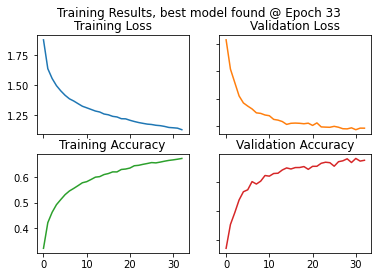

In [7]:
plot_results(stats)  # plot curves

### Checking Accuracy of Best Model

In [8]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 83.02%
Total Count:  40000
Total Match:  33208
-------------------------------------------
Test Accuracy of	0: 92.65% (3758/4056)
Test Accuracy of	1: 72.61% (2876/3961)
Test Accuracy of	2: 81.04% (3239/3997)
Test Accuracy of	3: 82.34% (3319/4031)
Test Accuracy of	4: 57.32% (2264/3950)
Test Accuracy of	5: 90.32% (3609/3996)
Test Accuracy of	6: 87.45% (3519/4024)
Test Accuracy of	7: 92.06% (3699/4018)
Test Accuracy of	8: 89.80% (3558/3962)
Test Accuracy of	9: 84.07% (3367/4005)
-------------------------------------------
Accuracy on valid data: 59.33%
Total Count:  10000
Total Match:  5933
-------------------------------------------
Test Accuracy of	0: 72.67% (686/944)
Test Accuracy of	1: 40.52% (421/1039)
Test Accuracy of	2: 55.93% (561/1003)
Test Accuracy of	3: 54.08% (524/969)
Test Accuracy of	4: 38.10% (400/1050)
Test Accuracy of	5: 67.43% (677/1004)
Test Accuracy of	6: 64.96% (634/976)
Test Accuracy of	7: 73.52% (72

### Confusion Matrix

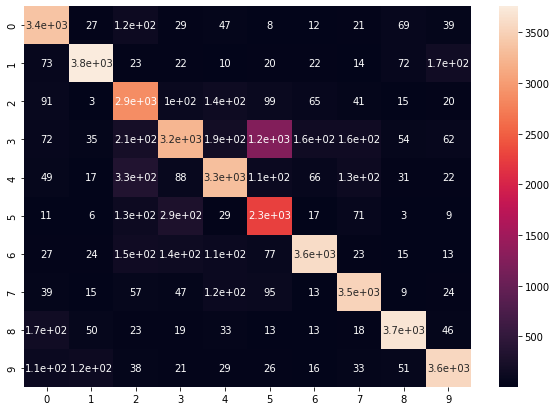

In [9]:
# confusion matrix of training data

pred = best_model.predict(train_set[0], train_set[1].shape[1])
pred_train_labels = np.argmax(pred, axis=1)

matrix = confusion_matrix(pred_train_labels, np.argmax(train_set[1], axis=1))
matrix = pd.DataFrame(matrix, index = np.arange(10), columns = np.arange(10))

pl.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)
pl.show()

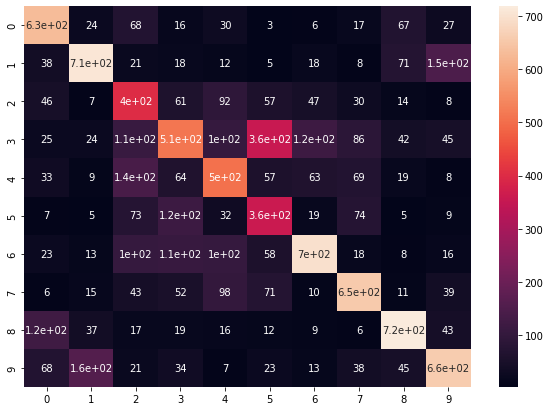

In [10]:
# confusion matrix of test data

pred = best_model.predict(test_set[0], test_set[1].shape[1])
pred_test_labels = np.argmax(pred, axis=1)

matrix = confusion_matrix(pred_test_labels, np.argmax(test_set[1], axis=1))
matrix_df = pd.DataFrame(matrix, index = np.arange(10), columns = np.arange(10))

pl.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)
pl.show()

### F1 Score

In [11]:
# Only used in evaluation
from sklearn.metrics import f1_score

f1_class = f1_score(test_set[1], pred_test_labels, average = 'weighted')
    
print("F1 Score:", np.round(f1_class, 5))

ModuleNotFoundError: No module named 'sklearn'